# DAT257x: Reinforcement Learning Explained

## Lab 2: Bandits

### Exercise 2.2B: Optimistic Greedy

In [2]:
import numpy as np
import sys

if "../" not in sys.path:
    sys.path.append("../") 

from lib.envs.bandit import BanditEnv
from lib.simulation import Experiment

In [14]:
#Policy interface
class Policy:
    #num_actions: (int) Number of arms [indexed by 0 ... num_actions-1]
    def __init__(self, num_actions):
        self.num_actions  = num_actions
    
    def act(self):
        pass
        
    def feedback(self, action, reward):
        pass

In [15]:
#Greedy policy
class Greedy(Policy):
    def __init__(self, num_actions):
        Policy.__init__(self, num_actions)
        self.name = "Greedy"
        self.total_rewards = np.zeros(num_actions, dtype = np.longdouble)
        self.total_counts = np.zeros(num_actions, dtype = np.longdouble)
    
    def act(self):
        current_averages = np.divide(self.total_rewards, self.total_counts, where = self.total_counts > 0)
        current_averages[self.total_counts <= 0] = 0.5      #Correctly handles Bernoulli rewards; over-estimates otherwise
        current_action = np.argmax(current_averages)
        return current_action
        
    def feedback(self, action, reward):
        self.total_rewards[action] += reward
        self.total_counts[action] += 1

Now let's implement an optimistic greedy policy based on the policy interface. The optimistic greedy policy initialize the ra to a large initial value R, which is implemented in the __init__() function, and then play the greedy algorithm.

We have given you some boiler plate code, you only need to modify the part as indicated.

In [28]:
#Optimistic Greedy policy
class OptimisticGreedy(Greedy):
    def __init__(self, num_actions, initial_value):
        Greedy.__init__(self, num_actions)
        self.name = "Optimistic Greedy"
        self.initial_value = initial_value;
        
        """Implement optimistic greedy here"""
        self.total_rewards = np.zeros(num_actions, dtype = np.longdouble) + initial_value
        self.total_counts = np.zeros(num_actions, dtype = np.longdouble)
    
    def act(self):
        current_averages = np.divide(self.total_rewards, self.total_counts, where = self.total_counts > 0)
        current_averages[self.total_counts <= 0] = self.initial_value
        current_action = np.argmax(current_averages)
        return current_action
        
    def feedback(self, action, reward):
        self.total_rewards[action] += reward
        self.total_counts[action] += 1        
        

Let's prepare the simulation. We'll use the same parameters as the exercise with the epsilon greedy.

In [29]:
evaluation_seed = 5016
num_actions = 10
trials = 10000
distribution = "bernoulli"

First, let's use R = 0. Run the simulation and observe the results.

Distribution: bernoulli [0.93160258 0.10144645 0.65359868 0.39412646 0.67036346 0.46602165
 0.95371529 0.87460326 0.22253422 0.11576875]
Optimal arm: 6


<Figure size 720x360 with 0 Axes>

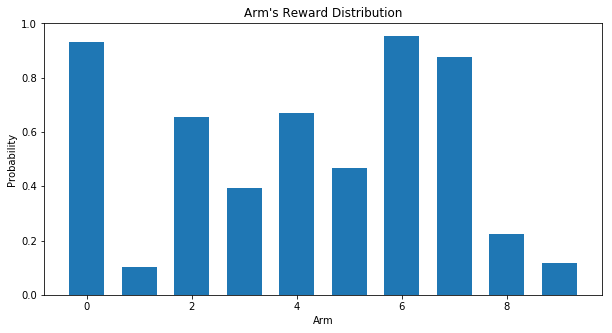

--------------------------------------------------
Policy: Optimistic Greedy 
Average Reward: 0.9313 
Average Regret: 0.02211270799034373
Arm pulls: [10000.     0.     0.     0.     0.     0.     0.     0.     0.     0.]


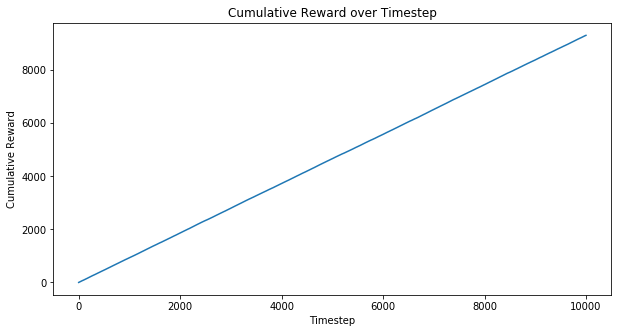

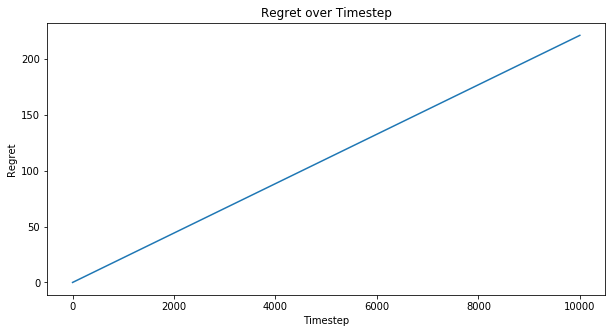

In [30]:
R = 0
env = BanditEnv(num_actions, distribution, evaluation_seed)
agent = OptimisticGreedy(num_actions, R)
experiment = Experiment(env, agent)
experiment.run_bandit(trials)

What about if R is a very large number? Say 10000, the same number as the number of trials? Run the simulation again and observe the results.

Distribution: bernoulli [0.93160258 0.10144645 0.65359868 0.39412646 0.67036346 0.46602165
 0.95371529 0.87460326 0.22253422 0.11576875]
Optimal arm: 6


<Figure size 720x360 with 0 Axes>

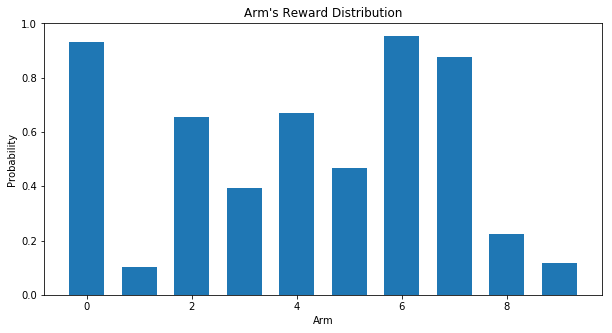

--------------------------------------------------
Policy: Optimistic Greedy 
Average Reward: 0.5523 
Average Regret: 0.40563176885336166
Arm pulls: [1040.  957. 1011.  985. 1013.  992. 1043. 1033.  968.  958.]


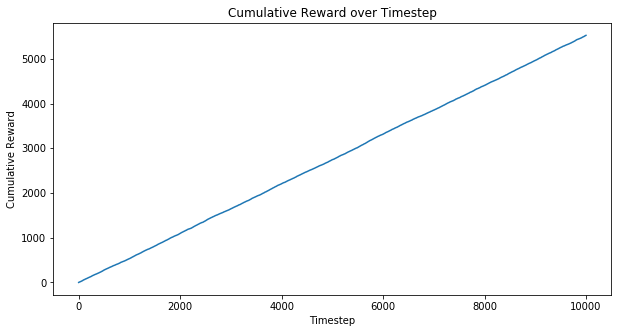

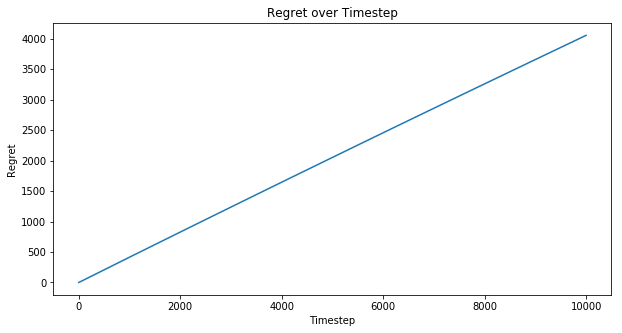

In [32]:
R = 10000
env = BanditEnv(num_actions, distribution, evaluation_seed)
agent = OptimisticGreedy(num_actions, R)
experiment = Experiment(env, agent)
experiment.run_bandit(trials)

Now, try several different number of R (1, 3, 5). Run the simulations and observe the results.

Distribution: bernoulli [0.93160258 0.10144645 0.65359868 0.39412646 0.67036346 0.46602165
 0.95371529 0.87460326 0.22253422 0.11576875]
Optimal arm: 6


<Figure size 720x360 with 0 Axes>

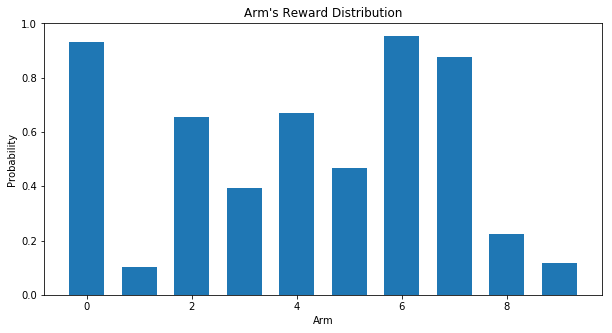

--------------------------------------------------
Policy: Optimistic Greedy 
Average Reward: 0.9301 
Average Regret: 0.02404506017111448
Arm pulls: [9.916e+03 2.000e+00 8.000e+00 3.000e+00 1.800e+01 9.000e+00 5.000e+00
 3.500e+01 2.000e+00 2.000e+00]


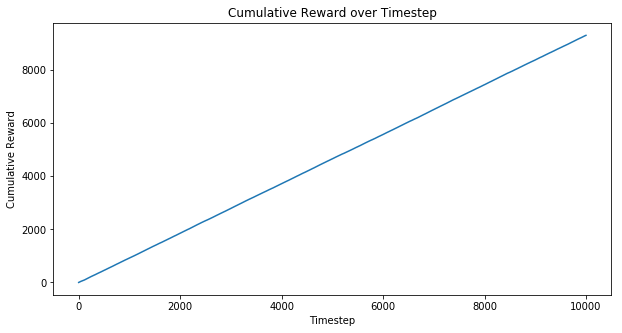

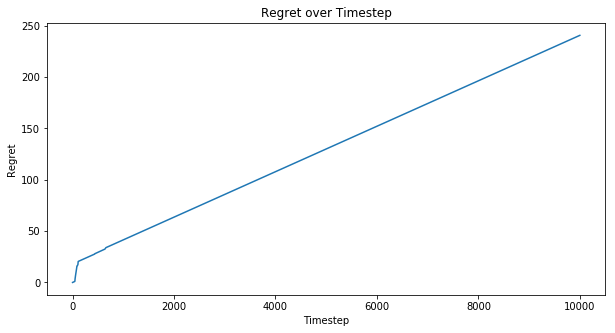

Distribution: bernoulli [0.93160258 0.10144645 0.65359868 0.39412646 0.67036346 0.46602165
 0.95371529 0.87460326 0.22253422 0.11576875]
Optimal arm: 6


<Figure size 720x360 with 0 Axes>

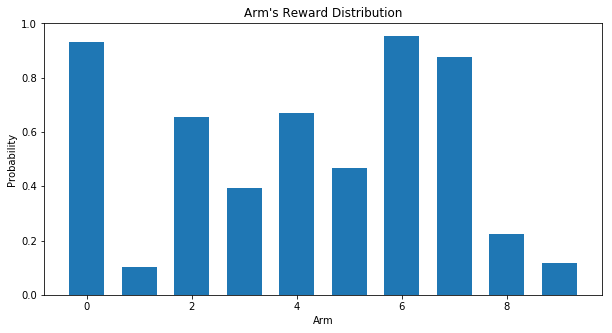

--------------------------------------------------
Policy: Optimistic Greedy 
Average Reward: 0.9481 
Average Regret: 0.005246571170266359
Arm pulls: [1.231e+03 5.000e+00 9.000e+00 5.000e+00 1.400e+01 4.000e+00 8.692e+03
 3.100e+01 4.000e+00 5.000e+00]


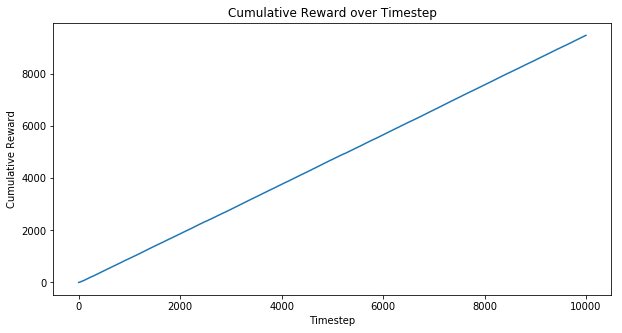

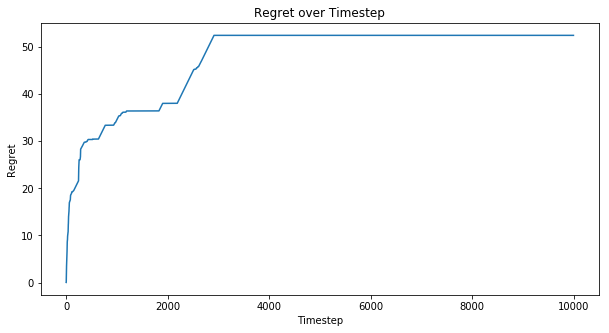

Distribution: bernoulli [0.93160258 0.10144645 0.65359868 0.39412646 0.67036346 0.46602165
 0.95371529 0.87460326 0.22253422 0.11576875]
Optimal arm: 6


<Figure size 720x360 with 0 Axes>

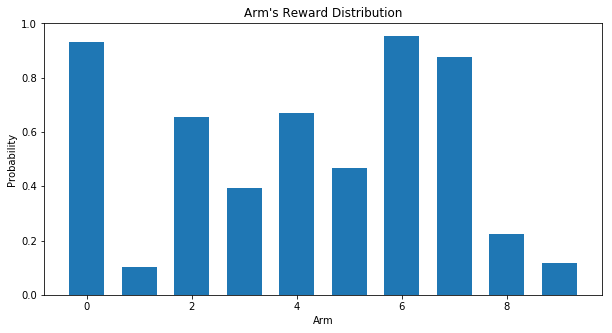

--------------------------------------------------
Policy: Optimistic Greedy 
Average Reward: 0.9482 
Average Regret: 0.003993781407020668
Arm pulls: [1.870e+02 6.000e+00 1.300e+01 1.000e+01 1.800e+01 7.000e+00 9.714e+03
 3.200e+01 7.000e+00 6.000e+00]


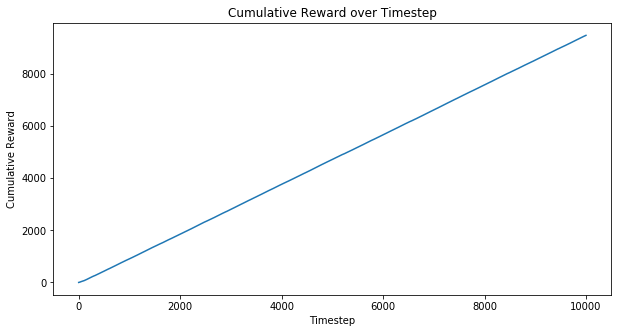

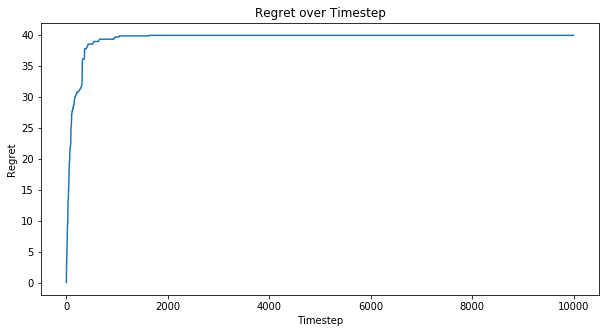

In [35]:
rr = np.array([1,3,5])
for r in rr:
    env = BanditEnv(num_actions, distribution, evaluation_seed)
    agent = OptimisticGreedy(num_actions, r)
    experiment = Experiment(env, agent)
    experiment.run_bandit(trials)
    

Which epsilon performs best with this problem?

Now let's prepare another simulation by setting a different seed. 

In [36]:
evaluation_seed = 1239
num_actions = 10
trials = 10000
distribution = "bernoulli"

Try the range of R again (0, 1, 3, 5, 10000), run the simulations and observe the results.

Distribution: bernoulli [0.5061565  0.74836123 0.53065236 0.37446716 0.88168477 0.83849367
 0.3951277  0.13217982 0.44509856 0.03459039]
Optimal arm: 4


<Figure size 720x360 with 0 Axes>

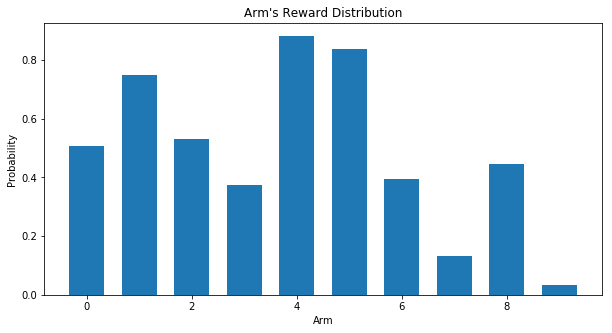

--------------------------------------------------
Policy: Optimistic Greedy 
Average Reward: 0.5068 
Average Regret: 0.3755282692312882
Arm pulls: [10000.     0.     0.     0.     0.     0.     0.     0.     0.     0.]


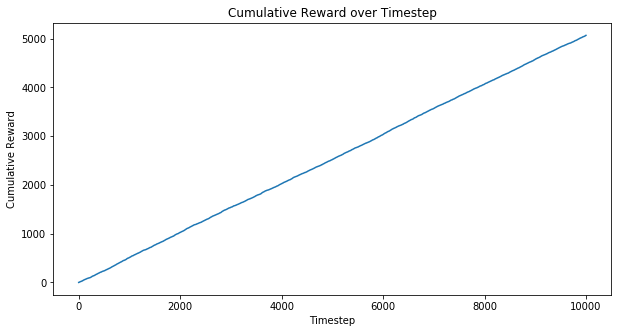

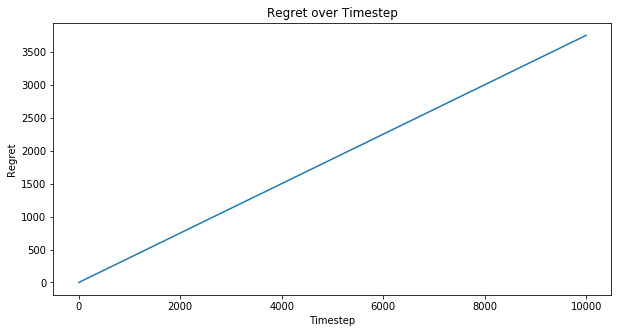

Distribution: bernoulli [0.5061565  0.74836123 0.53065236 0.37446716 0.88168477 0.83849367
 0.3951277  0.13217982 0.44509856 0.03459039]
Optimal arm: 4


<Figure size 720x360 with 0 Axes>

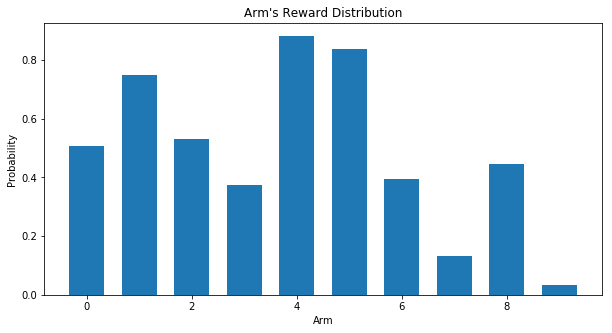

--------------------------------------------------
Policy: Optimistic Greedy 
Average Reward: 0.8739 
Average Regret: 0.0014628501116852397
Arm pulls: [3.000e+00 2.000e+00 6.000e+00 2.000e+00 9.964e+03 4.000e+00 4.000e+00
 2.000e+00 1.100e+01 2.000e+00]


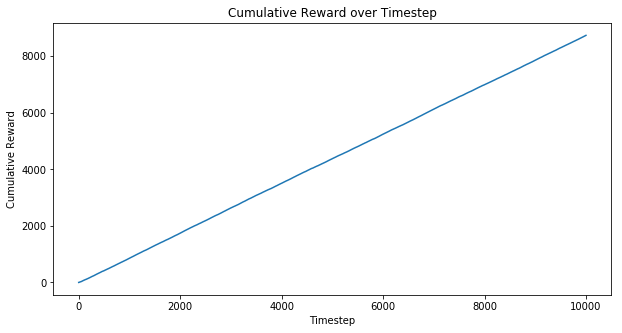

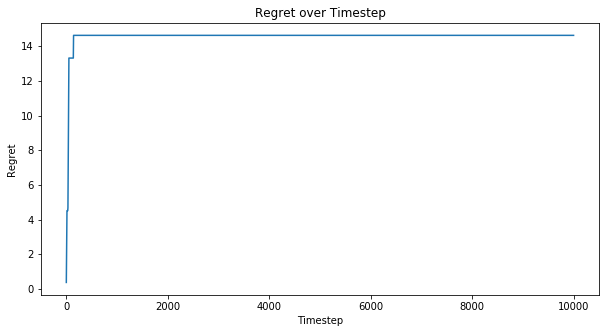

Distribution: bernoulli [0.5061565  0.74836123 0.53065236 0.37446716 0.88168477 0.83849367
 0.3951277  0.13217982 0.44509856 0.03459039]
Optimal arm: 4


<Figure size 720x360 with 0 Axes>

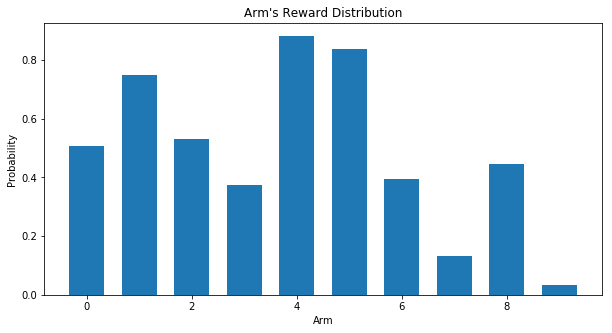

--------------------------------------------------
Policy: Optimistic Greedy 
Average Reward: 0.8726 
Average Regret: 0.0024366853659425793
Arm pulls: [1.000e+01 9.000e+00 5.000e+00 7.000e+00 9.913e+03 3.600e+01 6.000e+00
 6.000e+00 4.000e+00 4.000e+00]


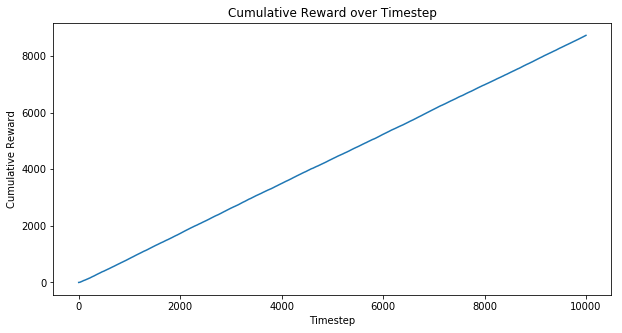

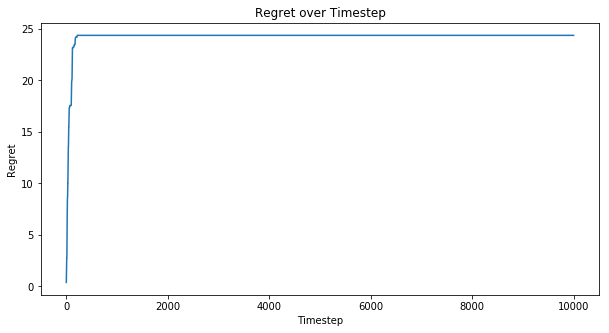

Distribution: bernoulli [0.5061565  0.74836123 0.53065236 0.37446716 0.88168477 0.83849367
 0.3951277  0.13217982 0.44509856 0.03459039]
Optimal arm: 4


<Figure size 720x360 with 0 Axes>

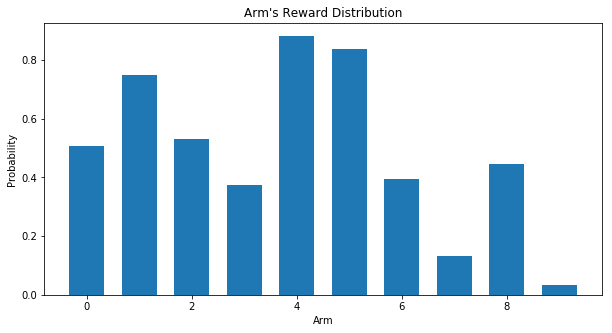

--------------------------------------------------
Policy: Optimistic Greedy 
Average Reward: 0.8713 
Average Regret: 0.00428277351396916
Arm pulls: [1.500e+01 2.100e+01 1.300e+01 1.800e+01 9.861e+03 4.000e+01 7.000e+00
 7.000e+00 1.200e+01 6.000e+00]


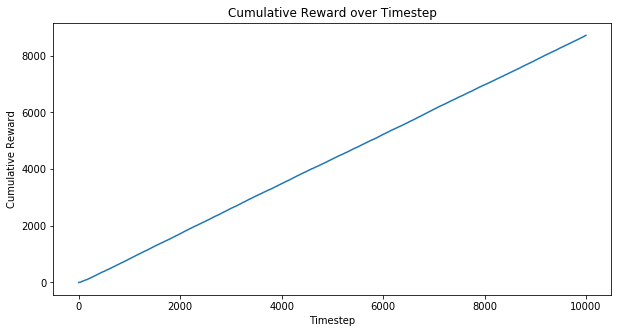

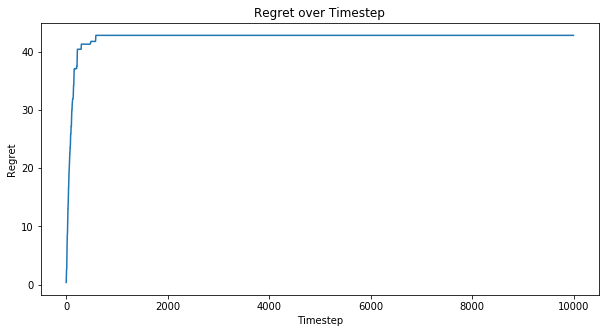

Distribution: bernoulli [0.5061565  0.74836123 0.53065236 0.37446716 0.88168477 0.83849367
 0.3951277  0.13217982 0.44509856 0.03459039]
Optimal arm: 4


<Figure size 720x360 with 0 Axes>

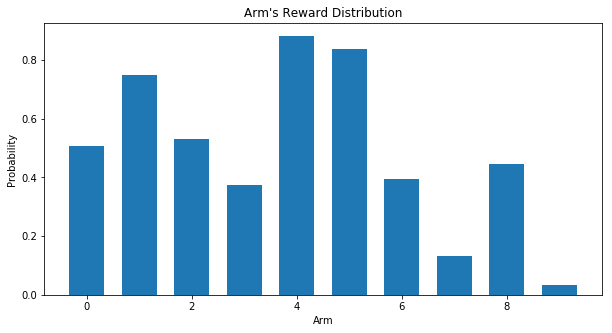

--------------------------------------------------
Policy: Optimistic Greedy 
Average Reward: 0.4982 
Average Regret: 0.3861847204693256
Arm pulls: [1000. 1024. 1003.  990. 1039. 1035.  991.  966.  996.  956.]


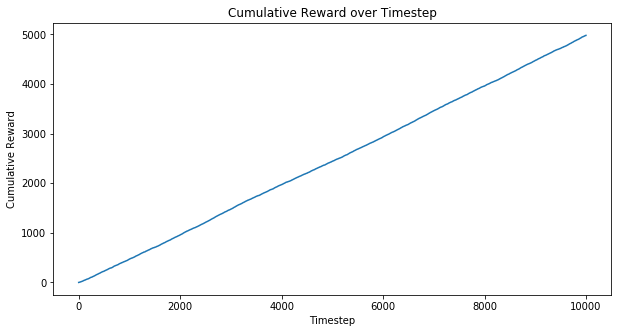

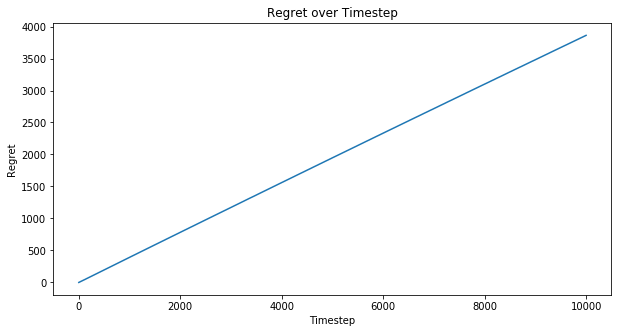

In [37]:
rr = np.array([0,1,3,5,10000])
for r in rr:
    env = BanditEnv(num_actions, distribution, evaluation_seed)
    agent = OptimisticGreedy(num_actions, r)
    experiment = Experiment(env, agent)
    experiment.run_bandit(trials)